In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

__Общая информация о датасете__

In [13]:
df = pd.read_csv("C:/Users/kuzne/Downloads/archive (1)/netflix_titles.csv")
print("\nРазмер данных\n")
print(df.shape)
print("\nИнформация о данных\n")
print(df.info())
print("\nНулевые значения\n")
print(df.isnull().sum())
print("\nПример данных\n")
df.head()


Размер данных

(8807, 12)

Информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Нулевые значения

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


__Обработка нулевых значений__

In [18]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print("===Анализ пропущенных значений===")
missing_info = pd.DataFrame({
    'Пропущено': missing,
    'Процент': missing_percent
})
print(missing_info[missing_info['Пропущено'] > 0].sort_values('Процент', ascending=False))


===Анализ пропущенных значений===
            Пропущено   Процент
date_added         10  0.113546
rating              4  0.045418
duration            3  0.034064
['September 25, 2021' 'September 24, 2021' 'September 23, 2021'
 'September 22, 2021' 'September 21, 2021' 'September 20, 2021'
 'September 19, 2021' 'September 17, 2021' 'September 16, 2021'
 'September 15, 2021']


In [21]:
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('No Cast')
df['director'] = df['director'].fillna('No Director')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df.shape
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      98
dtype: int64

__Анализ выбросов__

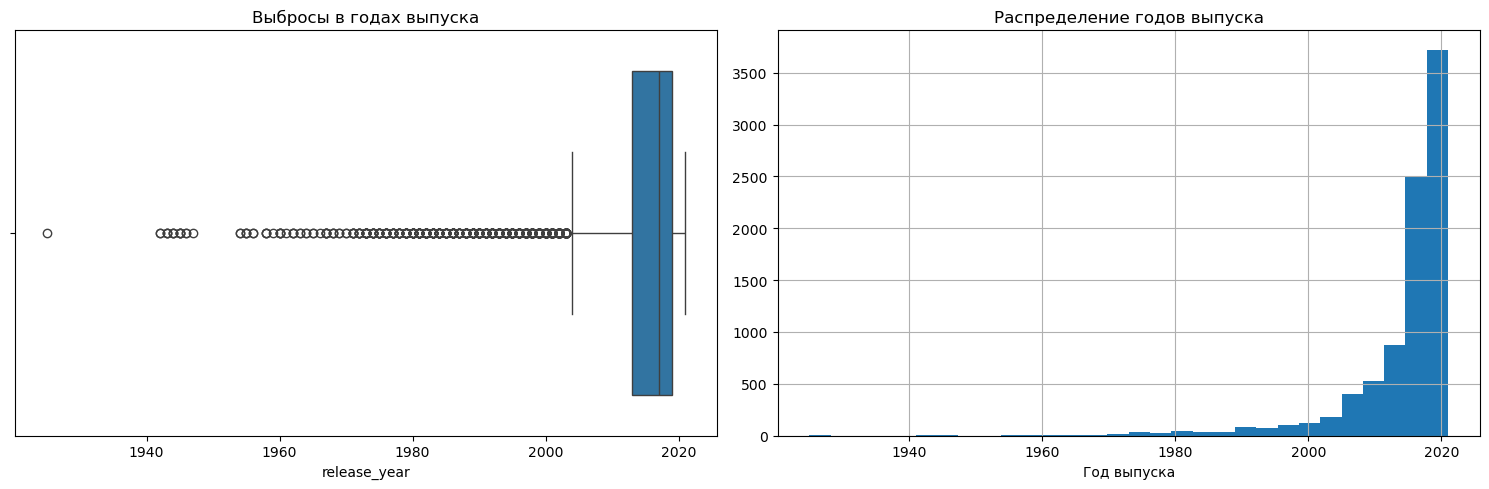

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='release_year')
plt.title('Выбросы в годах выпуска')
plt.subplot(1, 2, 2)
df['release_year'].hist(bins=30)
plt.title('Распределение годов выпуска')
plt.xlabel('Год выпуска')
plt.tight_layout()
plt.show()

In [25]:
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)]
print(f"Всего записей: {len(df)}")
print(f"Выбросов: {len(outliers)}")
print(f"Границы выбросов: до {lower_bound:.0f} года и после {upper_bound:.0f} года")
print(f"Самый старый фильм: {df['release_year'].min()} год")
print(f"Самый новый фильм: {df['release_year'].max()} год")

Всего записей: 8807
Выбросов: 719
Границы выбросов: до 2004 года и после 2028 года
Самый старый фильм: 1925 год
Самый новый фильм: 2021 год


__Анализ распределение контента__

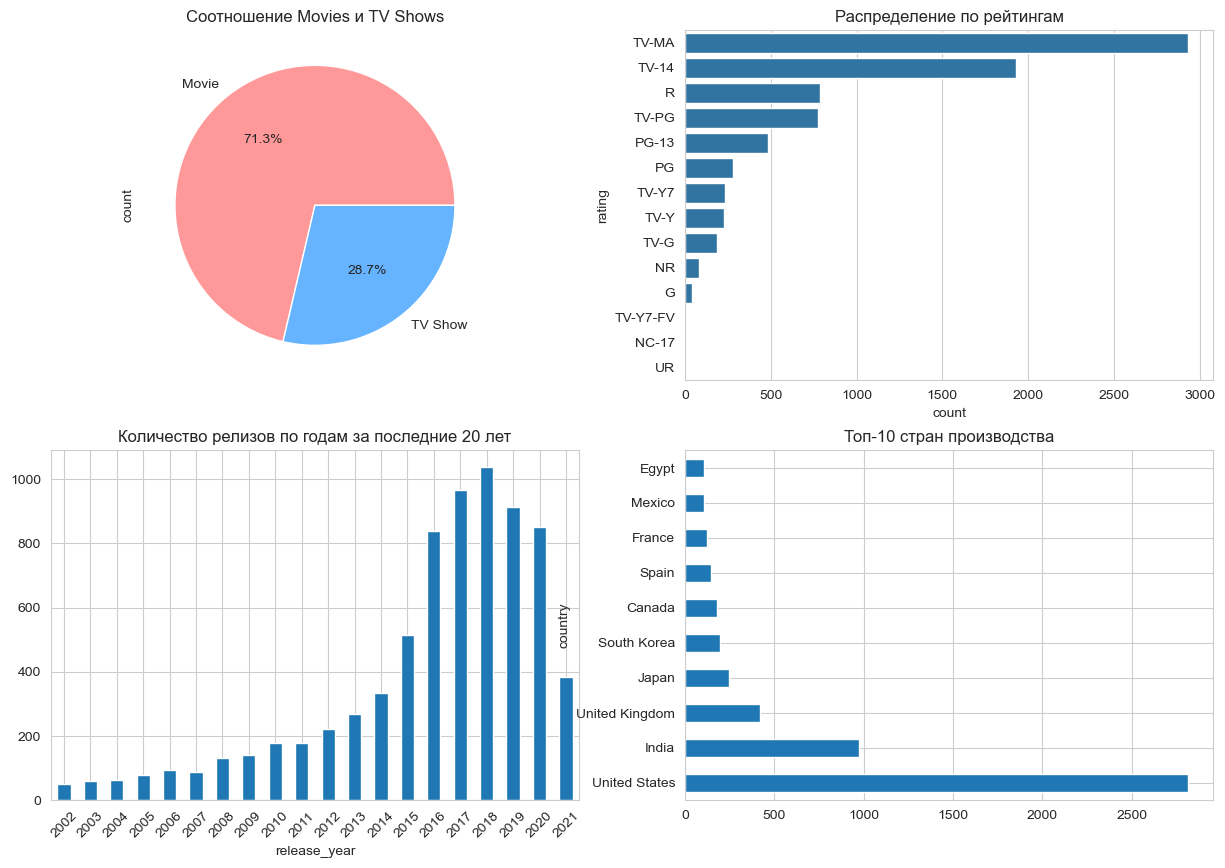

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
df = df[(df['country'] != 'Unknown') & (df['type'] != 'Unknown')]
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Соотношение Movies и TV Shows')

plt.subplot(2, 2, 2)
rating_order = df['rating'].value_counts().index
sns.countplot(data=df, y='rating', order=rating_order)
plt.title('Распределение по рейтингам')

plt.subplot(2, 2, 3)
df['release_year'].value_counts().sort_index().tail(20).plot(kind='bar')
plt.title('Количество релизов по годам за последние 20 лет')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df['country'].value_counts().head(10).plot(kind='barh')
plt.title('Топ-10 стран производства')

plt.show()

__Анализ роста популярности каталога по годам__

Text(0, 0.5, 'Количество добавленных значений')

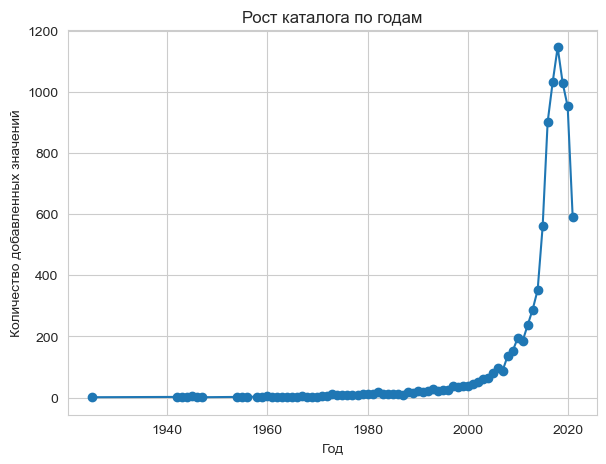

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Рост каталога по годам')
plt.xlabel('Год')
plt.ylabel('Количество добавленных значений')

__Топ жанров платформы__

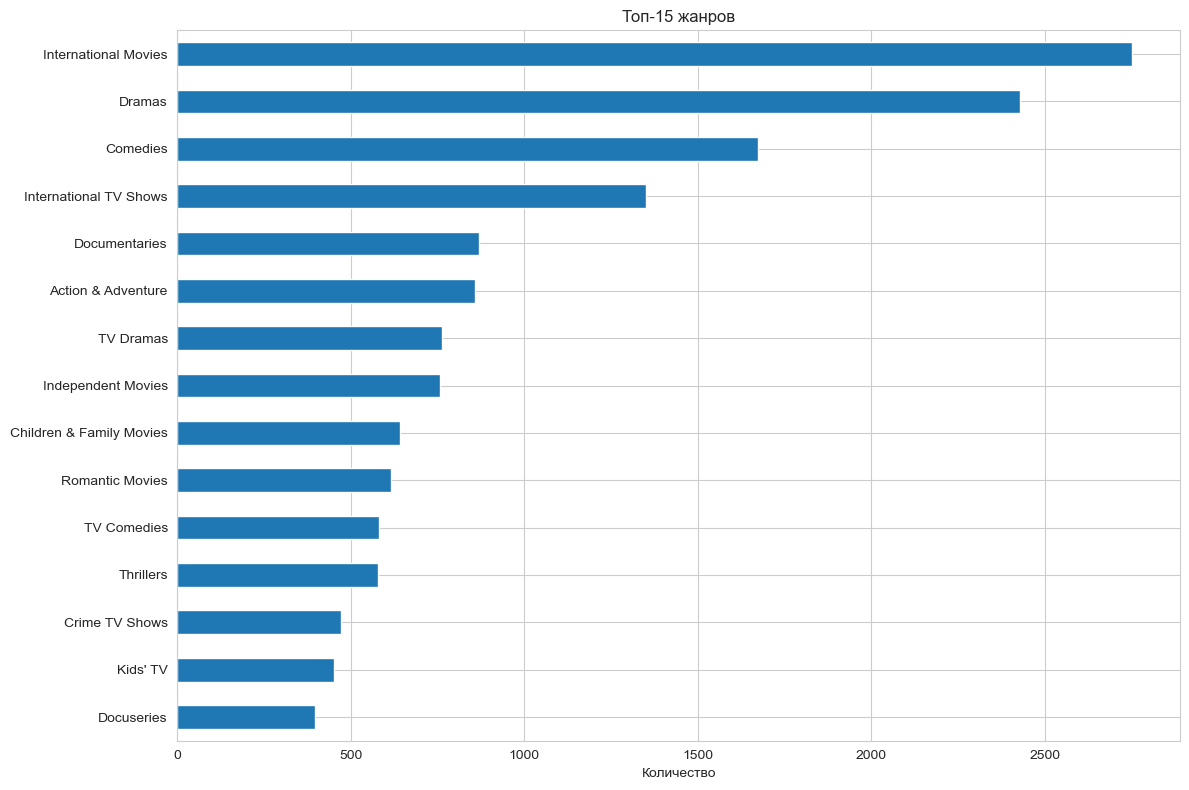

In [34]:
from collections import Counter
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([genre.strip() for genre in genres.split(',')])
genre_counts = Counter(all_genres)
plt.figure(figsize=(12, 8))
pd.Series(genre_counts).sort_values(ascending=True).tail(15).plot(kind='barh')
plt.title('Топ-15 жанров')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

СРАВНИТЕЛЬНАЯ СТАТИСТИКА
Фильмы: 5688 записей
Сериалы: 2285 записей


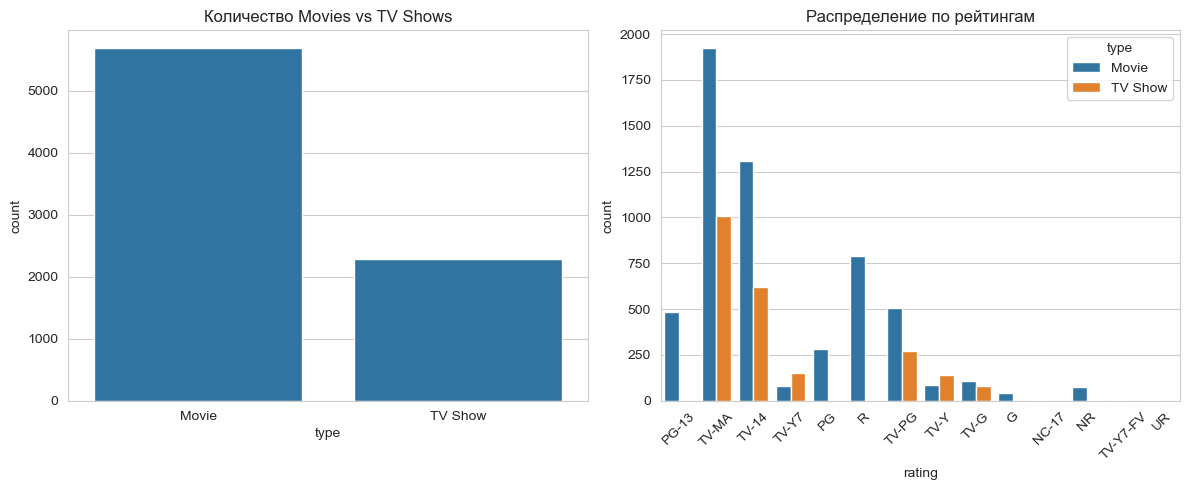

In [44]:
def select_type(dur):
    if 'Season' in str(dur):
        return 'TV Show'
    elif 'min' in str(dur):
        return 'Movie'
    else:
        return 'Unknown'
df = df[(df['type'] != 'Unknown') & (df['rating'] != 'Unknown')]     
df['type'] = df['duration'].apply(select_type)
movies = df[df['type'] == 'Movie']
tv = df[df['type'] == 'TV Show']

print('СРАВНИТЕЛЬНАЯ СТАТИСТИКА')
print(f"Фильмы: {len(movies)} записей")
print(f"Сериалы: {len(tv)} записей")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type')
plt.title('Количество Movies vs TV Shows')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='rating', hue='type')
plt.title('Распределение по рейтингам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [45]:
total_records = len(df)
movies_count = len(df[df['type'] == 'Movie'])
tv_count = len(df[df['type'] == 'TV Show'])
top_countries = df['country'].value_counts().head(3)

analysis_text = f"""
АНАЛИЗ КАТАЛОГА NETFLIX

ОБЩАЯ СТАТИСТИКА:
• Проанализировано записей: {total_records:,}
• Фильмы: {movies_count:,} ({movies_count/total_records*100:.1f}%)
• Сериалы: {tv_count:,} ({tv_count/total_records*100:.1f}%)
• Самый старый контент: {df['release_year'].min()} год
• Самый новый контент: {df['release_year'].max()} год

КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. ДОМИНИРОВАНИЕ ФИЛЬМОВ: Почти 70% каталога составляют фильмы, что может указывать на первоначальную фокусировку платформы на кинопрокате.

2. ГЕОГРАФИЧЕСКАЯ КОНЦЕНТРАЦИЯ:
   • 1-е место: {top_countries.index[0]} - {top_countries.iloc[0]:,} записей
   • 2-е место: {top_countries.index[1]} - {top_countries.iloc[1]:,} записей  
   • 3-е место: {top_countries.index[2]} - {top_countries.iloc[2]:,} записей

3. ПИК ПРОИЗВОДСТВА: Наибольшее количество контента выпущено в 2016-2020 годах с пиком в 2018 году, что совпадает с периодом активного продвижения Netflix на мировом рынке.

4. АМЕРИКАНСКИЙ АКЦЕНТ: Доля контента из США превышает суммарный объем следующих 9 стран в топ-10, что отражает американское происхождение платформы и стратегию локального производства.
"""

print(analysis_text)


АНАЛИЗ КАТАЛОГА NETFLIX

ОБЩАЯ СТАТИСТИКА:
• Проанализировано записей: 7,973
• Фильмы: 5,688 (71.3%)
• Сериалы: 2,285 (28.7%)
• Самый старый контент: 1942 год
• Самый новый контент: 2021 год

КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
1. ДОМИНИРОВАНИЕ ФИЛЬМОВ: Почти 70% каталога составляют фильмы, что может указывать на первоначальную фокусировку платформы на кинопрокате.

2. ГЕОГРАФИЧЕСКАЯ КОНЦЕНТРАЦИЯ:
   • 1-е место: United States - 2,815 записей
   • 2-е место: India - 972 записей  
   • 3-е место: United Kingdom - 419 записей

3. ПИК ПРОИЗВОДСТВА: Наибольшее количество контента выпущено в 2016-2020 годах с пиком в 2018 году, что совпадает с периодом активной экспансии Netflix на мировые рынки.

4. АМЕРИКАНСКИЙ АКЦЕНТ: Доля контента из США превышает суммарный объем следующих 9 стран в топ-10, что отражает американское происхождение платформы и стратегию локального производства.

